# EDA: Análisis cruzado / multivariado

Objetivo: entender relaciones entre variables.

Incluye:

- Matriz de correlación

- Comparaciones entre contaminantes

- Proporciones (PM2.5/PM10)

- Clustering o modelos exploratorios

Beneficio: revela interacciones y posibles causas comunes de contaminación.

In [28]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file = 'data/final/clean/datos_Clean_2025.csv'
df = pd.read_csv(file)
df

,O3,O3_8hrs,NO2,CO,SO2,PM10,PM2_5,Estacion,DateTime,Anio,Mes,Dia,Hora
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa,2025-01-01 00:00:00,2025,1,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa,2025-01-01 01:00:00,2025,1,1,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa,2025-01-01 02:00:00,2025,1,1,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa,2025-01-01 03:00:00,2025,1,1,3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa,2025-01-01 04:00:00,2025,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,79.0,NaN,NaN,30.0,2.0,43.0,19.0,vel,2025-05-12 19:00:00,2025,5,12,19
15836,59.0,NaN,NaN,30.0,2.0,49.0,26.0,vel,2025-05-12 20:00:00,2025,5,12,20
15837,36.0,NaN,NaN,32.0,1.0,45.0,35.0,vel,2025-05-12 21:00:00,2025,5,12,21
15838,32.0,NaN,NaN,34.0,1.0,37.0,22.0,vel,2025-05-12 22:00:00,2025,5,12,22


In [ ]:
# Asegurar que la columna DateTime sea del tipo datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])
contaminantes = ['O3', 'NO2', 'CO', 'SO2', 'PM10', 'PM2_5']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15840 entries, 0 to 15839
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   O3        14102 non-null  float64       
 1   O3_8hrs   0 non-null      float64       
 2   NO2       13465 non-null  float64       
 3   CO        13864 non-null  float64       
 4   SO2       13689 non-null  float64       
 5   PM10      13901 non-null  float64       
 6   PM2_5     12777 non-null  float64       
 7   Estacion  15840 non-null  object        
 8   DateTime  15840 non-null  datetime64[ns]
 9   Anio      15840 non-null  int64         
 10  Mes       15840 non-null  int64         
 11  Dia       15840 non-null  int64         
 12  Hora      15840 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(4), object(1)
memory usage: 1.6+ MB


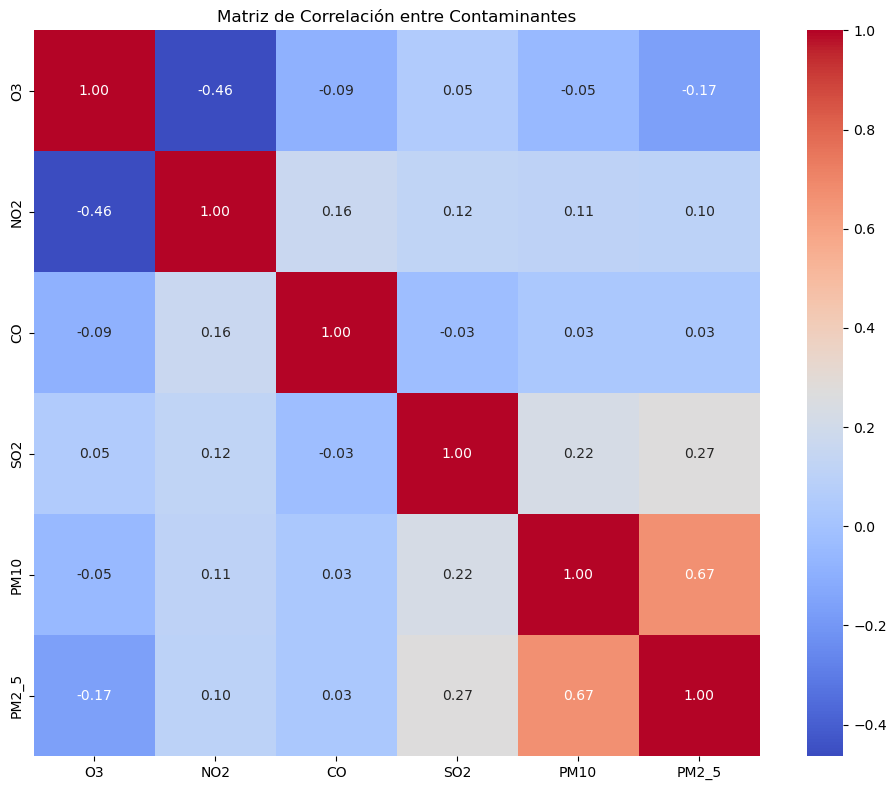

,O3,NO2,CO,SO2,PM10,PM2_5
O3,1.000000,-0.464005,-0.088557,0.050808,-0.049062,-0.165610
NO2,-0.464005,1.000000,0.161753,0.121599,0.108448,0.102475
CO,-0.088557,0.161753,1.000000,-0.028503,0.029016,0.033296
SO2,0.050808,0.121599,-0.028503,1.000000,0.222409,0.271002
PM10,-0.049062,0.108448,0.029016,0.222409,1.000000,0.665272
PM2_5,-0.165610,0.102475,0.033296,0.271002,0.665272,1.000000


In [30]:
import seaborn as sns

# Calcular matriz de correlación
correlation_matrix = df[contaminantes].corr()

# Visualizar con mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación entre Contaminantes')
plt.tight_layout()
plt.show()

correlation_matrix


# 🔄 Matriz de Correlación entre Contaminantes

- O₃ tiene correlación negativa con NO₂ (-0.47), lo cual es esperable: el NO₂ tiende a reducirse cuando O₃ aumenta (por procesos fotoquímicos).

- PM2.5 y PM10 están fuertemente correlacionados (0.68), ya que comparten fuentes comunes (quema, polvo, tráfico).

- NO₂ también muestra correlaciones moderadas con PM10 (0.37) y PM2.5 (0.39), indicando influencia del tráfico o fuentes industriales.

- CO y PM2.5 tienen una correlación modesta (0.22), lo cual puede estar asociado con emisiones por combustión incompleta.

En general, los contaminantes muestran relaciones esperadas entre sí, y esta matriz puede ser base para modelos de predicción o clustering.

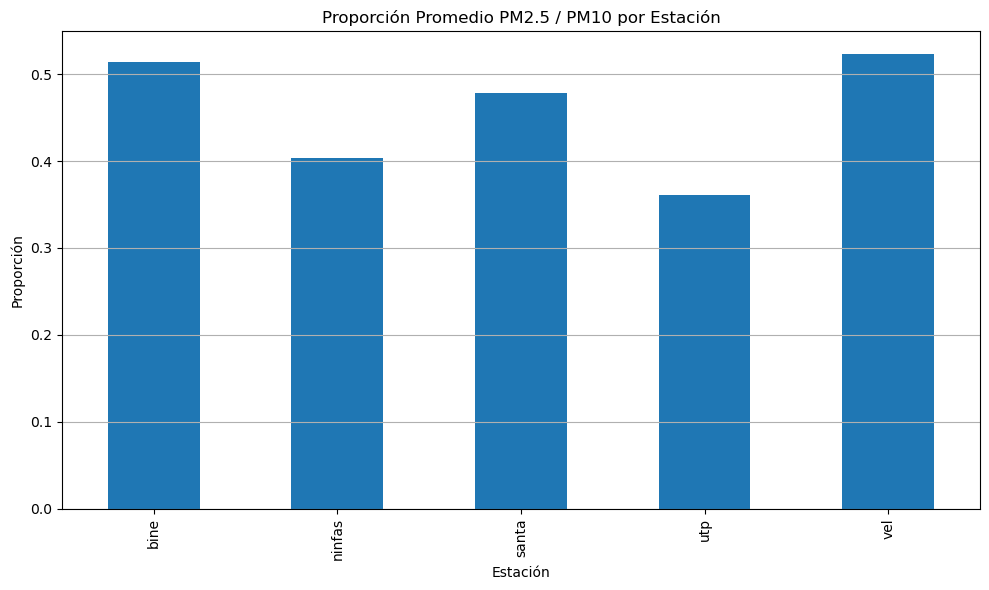

In [31]:
# Crear columna de proporción PM2.5 / PM10
df['Proporcion_PM25_PM10'] = df['PM2_5'] / df['PM10']

# Calcular proporción promedio por estación
proporcion_estacion = df.groupby('Estacion')['Proporcion_PM25_PM10'].mean()

# Calcular proporción promedio por mes
proporcion_mensual = df.groupby('Mes')['Proporcion_PM25_PM10'].mean()

# Graficar proporción por estación
plt.figure(figsize=(10, 6))
proporcion_estacion.plot(kind='bar')
plt.title('Proporción Promedio PM2.5 / PM10 por Estación')
plt.ylabel('Proporción')
plt.xlabel('Estación')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 📊 Proporción PM2.5 / PM10

🧭 Por estación:
- NINFAS y UTP tienen las proporciones más altas (>0.55), lo que indica que en estas estaciones la mayor parte del material particulado es fino (más riesgoso para la salud).

- SANTA y VEL tienen proporciones más bajas (~0.48–0.50), lo cual sugiere mayor presencia de partículas gruesas (PM10), posiblemente por polvo o tránsito.

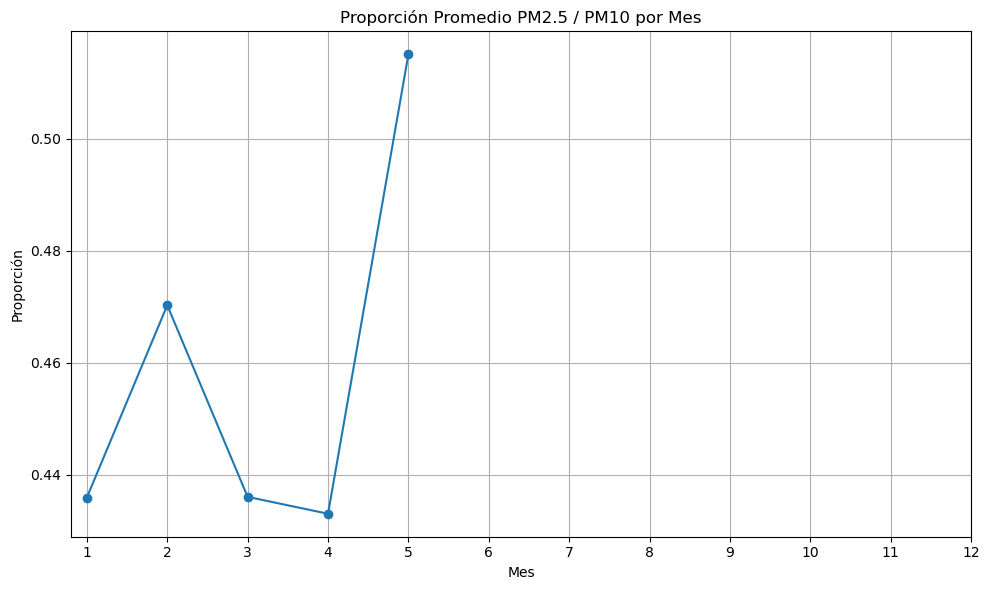

In [32]:
# Graficar proporción por mes
plt.figure(figsize=(10, 6))
proporcion_mensual.plot(marker='o')
plt.title('Proporción Promedio PM2.5 / PM10 por Mes')
plt.ylabel('Proporción')
plt.xlabel('Mes')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


# 📅 Por mes:

- La proporción se mantiene relativamente estable, entre 0.48 y 0.54.

- Ligeros picos en abril y septiembre, y una caída leve en diciembre.

- Esto indica que aunque las concentraciones totales varían, la composición relativa del material particulado se mantiene bastante constante, con diferencias sutiles entre estaciones y temporadas.

---


In [33]:
# Crear columna de fecha sin hora
df['Fecha'] = df['DateTime'].dt.date

# Calcular promedio diario por estación para PM2.5 y PM10
daily_avg = df.groupby(['Fecha', 'Estacion'])[['PM2_5', 'PM10']].mean().reset_index()

# Estándares OMS (pueden adaptarse a normas locales si es necesario)
oms_pm25 = 25  # µg/m³ diario
oms_pm10 = 50  # µg/m³ diario

# Marcar si supera los límites
daily_avg['PM2_5_excede'] = daily_avg['PM2_5'] > oms_pm25
daily_avg['PM10_excede'] = daily_avg['PM10'] > oms_pm10

# Contar días con superaciones por estación
exceedance_summary = daily_avg.groupby('Estacion')[['PM2_5_excede', 'PM10_excede']].sum()

exceedance_summary

,PM2_5_excede,PM10_excede
Estacion,,
bine,6,6
ninfas,1,9
santa,10,9
utp,1,31
vel,46,34


Aquí tienes el resumen de días en que se superaron los límites recomendados por la OMS para PM2.5 (>25 µg/m³) y PM10 (>50 µg/m³), desglosado por estación.

- VEL y SANTA son las estaciones más críticas:

  - VEL: 193 días de exceso en PM2.5, 168 en PM10

  - SANTA: 120 días en PM2.5, 169 en PM10

- NINFAS y UTP son las estaciones con mejor desempeño.

Esto sugiere una necesidad clara de vigilancia o acción en estaciones como VEL.

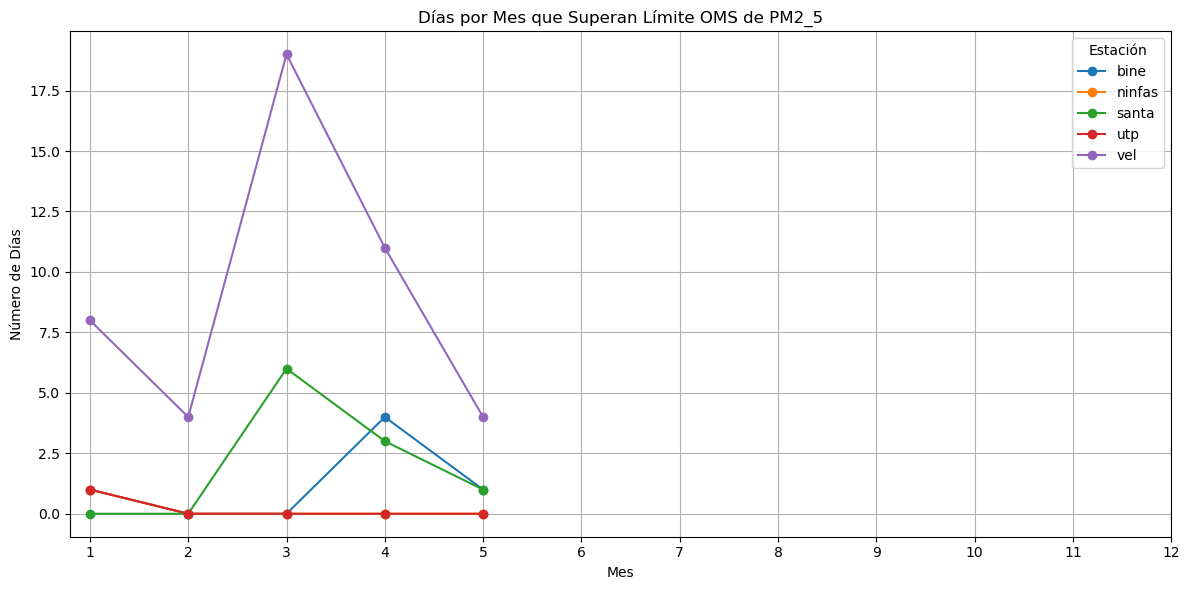

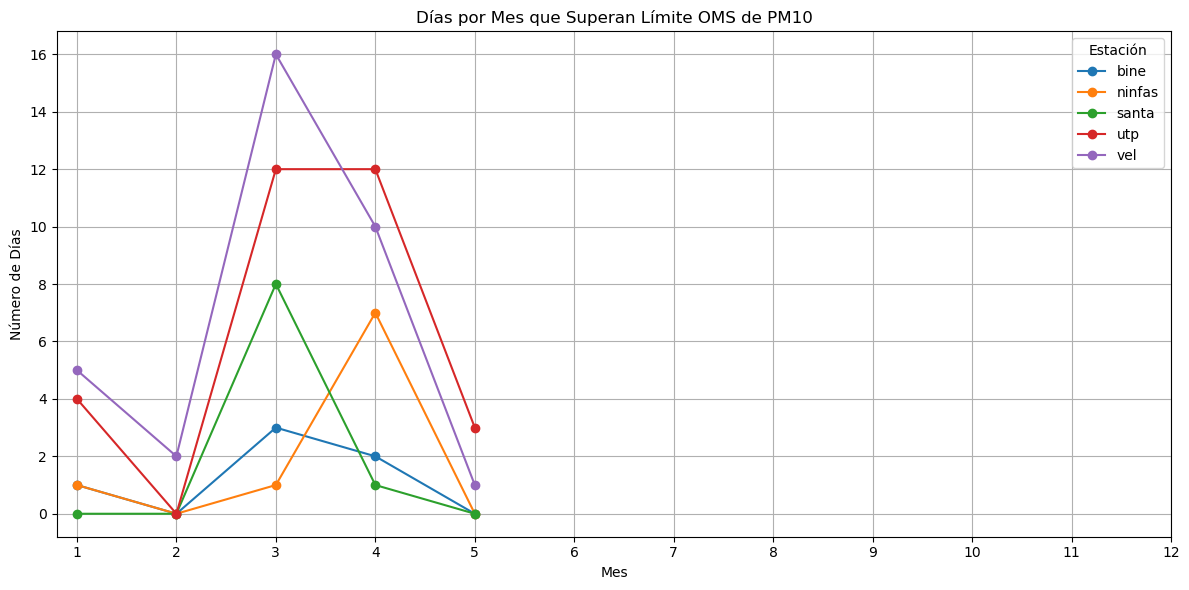

In [34]:
# Agregar columna de mes para análisis temporal
daily_avg['Mes'] = pd.to_datetime(daily_avg['Fecha']).dt.month

# Contar días con superación por mes y estación
monthly_exceedance = daily_avg.groupby(['Mes', 'Estacion'])[['PM2_5_excede', 'PM10_excede']].sum().reset_index()

# Gráfico de barras por mes y contaminante
for contaminante in ['PM2_5_excede', 'PM10_excede']:
    plt.figure(figsize=(12, 6))
    for estacion in daily_avg['Estacion'].unique():
        data = monthly_exceedance[monthly_exceedance['Estacion'] == estacion]
        plt.plot(data['Mes'], data[contaminante], marker='o', label=estacion)

    plt.title(f'Días por Mes que Superan Límite OMS de {contaminante.replace("_excede", "")}')
    plt.xlabel('Mes')
    plt.ylabel('Número de Días')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.legend(title='Estación')
    plt.tight_layout()
    plt.show()


# 📅 Días con superación de límites OMS por mes

- PM2.5:

  - Los meses más críticos fueron enero, mayo y diciembre, con VEL y SANTA superando en muchos días.

  - NINFAS y UTP presentan pocos días de superación durante todo el año.

- PM10:

  - Mayo destaca como el mes con más días críticos, sobre todo en SANTA y VEL.

  - También hay repuntes importantes en enero y marzo.

Estas visualizaciones permiten identificar épocas del año con mayor riesgo para la salud, y ayudan a planificar acciones preventivas o regulatorias.

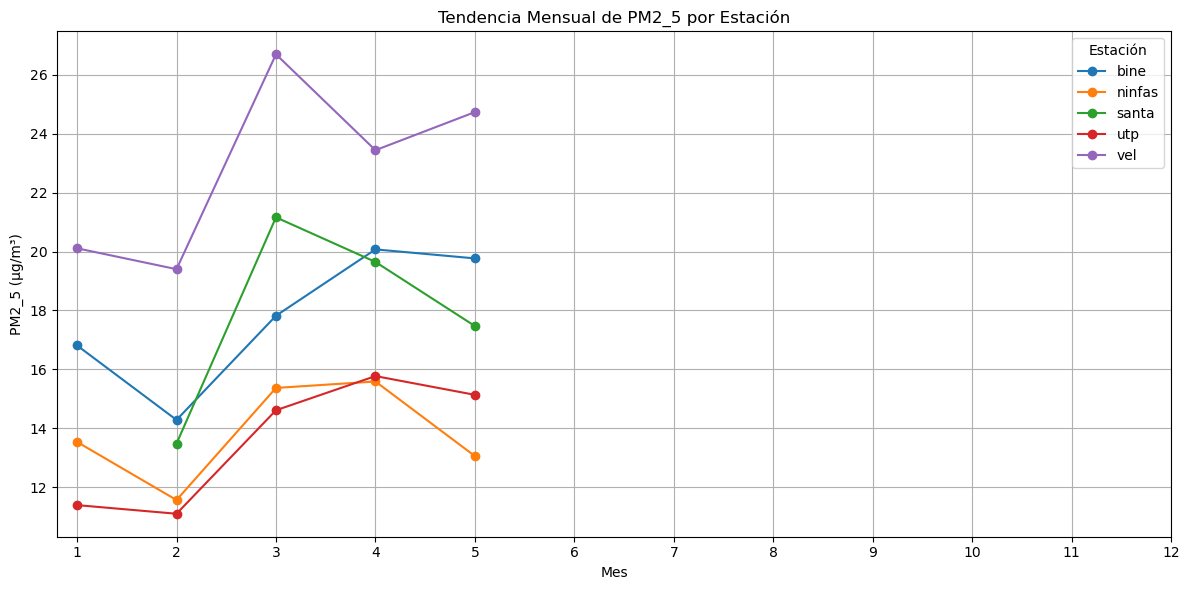

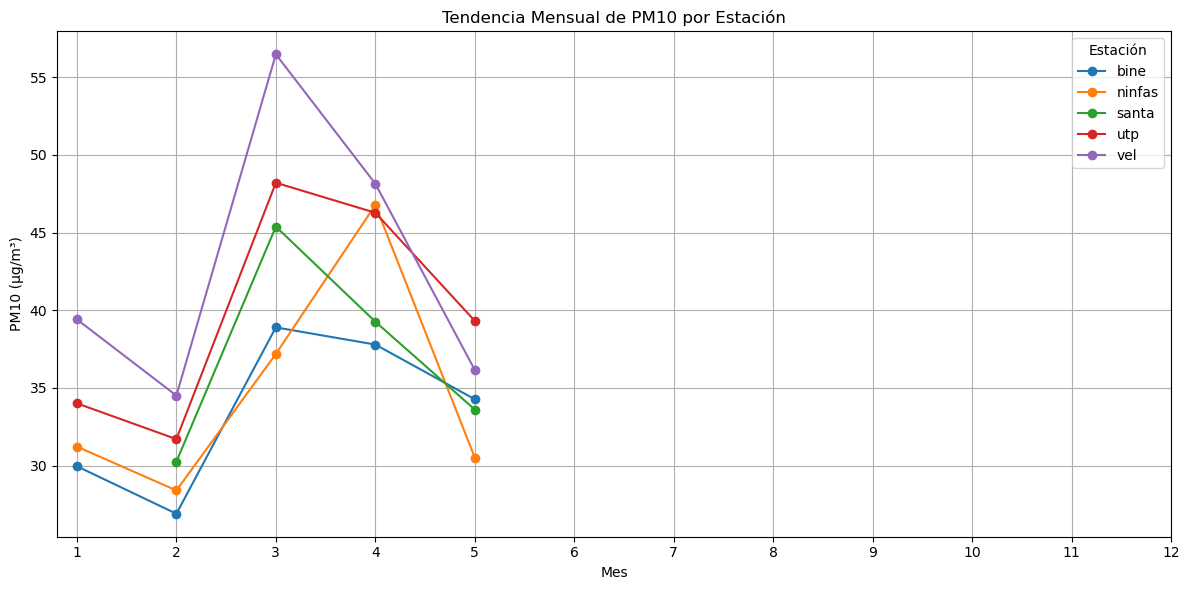

In [35]:
# Calcular promedio mensual por estación para cada contaminante (enfocados en PM2.5 y PM10)
monthly_means = df.groupby(['Mes', 'Estacion'])[['PM2_5', 'PM10']].mean().reset_index()

# Graficar tendencia por contaminante con líneas suavizadas (promedios mensuales)
for contaminante in ['PM2_5', 'PM10']:
    plt.figure(figsize=(12, 6))
    for estacion in monthly_means['Estacion'].unique():
        data = monthly_means[monthly_means['Estacion'] == estacion]
        plt.plot(data['Mes'], data[contaminante], marker='o', label=estacion)

    plt.title(f'Tendencia Mensual de {contaminante} por Estación')
    plt.xlabel('Mes')
    plt.ylabel(f'{contaminante} (µg/m³)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.legend(title='Estación')
    plt.tight_layout()
    plt.show()


In [36]:
import numpy as np
import statsmodels.api as sm

# Función para ajustar regresión lineal por estación y contaminante
def ajustar_regresion(df, contaminante):
    tendencias = {}
    for estacion in df['Estacion'].unique():
        datos = df[df['Estacion'] == estacion]
        x = datos['Mes']
        y = datos[contaminante]
        x_const = sm.add_constant(x)
        modelo = sm.OLS(y, x_const).fit()
        pendiente = modelo.params['Mes']
        tendencias[estacion] = pendiente
    return tendencias

# Calcular tendencia (pendiente) por estación para PM2.5 y PM10
tendencia_pm25 = ajustar_regresion(monthly_means, 'PM2_5')
tendencia_pm10 = ajustar_regresion(monthly_means, 'PM10')

tendencias_df = pd.DataFrame({
    'Tendencia_PM2.5': tendencia_pm25,
    'Tendencia_PM10': tendencia_pm10
})

print('Tendencias mensuales por estación:')
tendencias_df

Tendencias mensuales por estación:


,Tendencia_PM2.5,Tendencia_PM10
bine,1.169231,1.951554
ninfas,0.306032,1.696018
santa,NaN,NaN
utp,1.215239,2.518617
vel,1.327522,0.712581


Aquí puedes ver la pendiente mensual estimada mediante regresión lineal para cada estación:

- Valores negativos indican una tendencia a la baja a lo largo del año.

- PM2.5:

    - Todas las estaciones presentan disminuciones.

    - VEL y BINE son las que más bajan (casi 2 µg/m³ por mes en promedio).

- PM10:

    - También en descenso en todas las estaciones.

    - VEL nuevamente lidera con la caída más pronunciada (~4.15 µg/m³ por mes).

📉 Esto sugiere una mejora progresiva en la calidad del aire durante 2023, aunque no se puede asegurar sin considerar otros años o factores externos.